# Task 1 - Context

In [1]:

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import random
from tqdm import tqdm
import time 



# Task 2 - The Data

Dataset information

Network was collected by crawling Amazon website. It is based on Customers Who Bought This Item Also Bought feature of the Amazon website. If a product i is frequently co-purchased with product j, the graph contains an undirected edge from i to j. Each product category provided by Amazon defines each ground-truth community.

We regard each connected component in a product category as a separate ground-truth community. We remove the ground-truth communities which have less than 3 nodes. We also provide the top 5,000 communities with highest quality which are described in our paper. As for the network, we provide the largest connected component. 

## Task
- Explain the dataset itself (e.g., what do the nodes and edges represent?).
- Explain how the dataset is suitable for the project from Task 1. Show a helpful visualization of
(part of) to support your explanation.

In [2]:
#/home/generalpegasus/Documents/Programme/PorfolioExamDataMining/data/twitch/DE/musae_DE_edges.csv
#file_path = Path(os.path.join('..', 'data', 'twitch/DE/musae_DE_edges.csv'))


temporary_file = Path(os.path.join('..', 'data', 'facebook_combined.txt'))
df_graph = pd.read_csv(temporary_file, header=None, names=['from', 'to'], sep=' ')
display(df_graph.head())

,from,to
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [3]:
# file_path = Path(os.path.join('..', 'data', 'com-amazon.ungraph.txt.gz'))
# df_graph = pd.read_csv(file_path, compression='gzip', delimiter='\t', skiprows=3).rename(columns={'# FromNodeId': 'from', 'ToNodeId': 'to'})
# display(df_graph.head())

# Task 3 – IDA and Preprocessing

In [4]:
G = nx.from_pandas_edgelist(df_graph, 'from', 'to')

print(f'Number of Edges: {G.size()}')
print(f'Number of Nodes: {G.order()}')



Number of Edges: 88234
Number of Nodes: 4039


## Handshaking Lemma
The Handshaking Lemma is a fundamental rule which states for undirected graphs. 
The sum of the degree of all vertices in an undirected graph is equal to twice the number of edges.

$\sum_{v \in V} \deg(v) = 2 \cdot |E|$

The following code checks whether the graph is undirected by applying the Handshaking Lemma.

For this we first bring the graph `G` into the Adjacency Matrix


In [5]:

A = nx.adjacency_matrix(G)

print(f'Adjacency Matrix shape: \n{A.shape}\n')

print(f'Sum of the Degrees:\n{A.sum()}\n') # Summing up the degree

if A.sum() == 2*G.size():
    print('The Handshake Lemma holds')
else:
    print('The Handshake Lemma does not hold ')


Adjacency Matrix shape: 
(4039, 4039)

Sum of the Degrees:
176468

The Handshake Lemma holds


## Basic Properties 



In [6]:
# # draw Grpah
# plt.figure(figsize=(15, 15))
# pos = nx.spring_layout(G, seed=42)
# nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=200, edge_color='gray')
# plt.title("Graph G")
# plt.show()

### Degree Distribution
The degree distribution show the frequency of degrees. How often occur a number of degrees of a graph. 

### CCRF
The Complementary Cumulative Relative Frequency (CCRF) of Degrees is a statistical representation that shows the proportion of nodes in a graph whose degree is greater than or equal to a given value.

In [7]:
def basic_graph_properties(G):


    graph_properties = {
        'Number of nodes': G.number_of_nodes(),
        'Number of edges': G.number_of_edges(),
        'Density': nx.density(G),
        'Is undirected graph': not nx.is_directed(G),
        'Is connected':nx.is_connected(G)
    }

    if not nx.is_directed(G):
        graph_properties['Number of connected components'] = nx.number_connected_components(G)
        largest_cc = max(nx.connected_components(G), key=len)
        graph_properties['Size of largest connected component'] = len(largest_cc)

    graph_properties['Average cluster coefficient'] = nx.average_clustering(G)
    return graph_properties


In [8]:
def degree_distribution(G):
    

    # Degree distribution
    degrees = [d for _, d in G.degree()]
    #degree_hist = np.histogram(degrees, bins=range(min(degrees), max(degrees) + 1))

    # CCDF
    degree_counts = np.bincount(degrees)
    ccdf = 1.0 - np.cumsum(degree_counts) / sum(degree_counts)

    # Plot
    plt.figure(figsize=(12, 6))

    # Degree Distribution
    plt.subplot(1, 2, 1)
    plt.hist(degrees, bins=30, edgecolor="k")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title("Degree Distribution")

    # CCDF
    plt.subplot(1, 2, 2)
    plt.plot(range(len(ccdf)), ccdf, marker="o", linestyle="none")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Degree (log scale)")
    plt.ylabel("CCDF (log scale)")
    plt.title("Complementary Cumulative Distribution Function")

    plt.tight_layout()
    plt.show()


Degree Distribution before preprocessing:



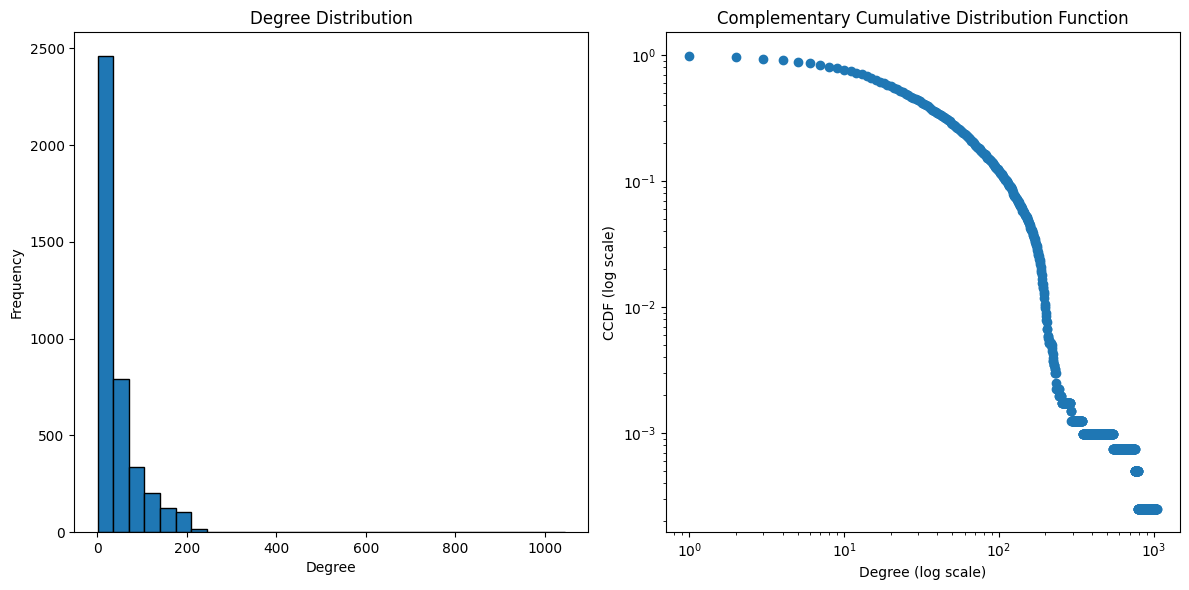

Degree Distribution after preprocessing:



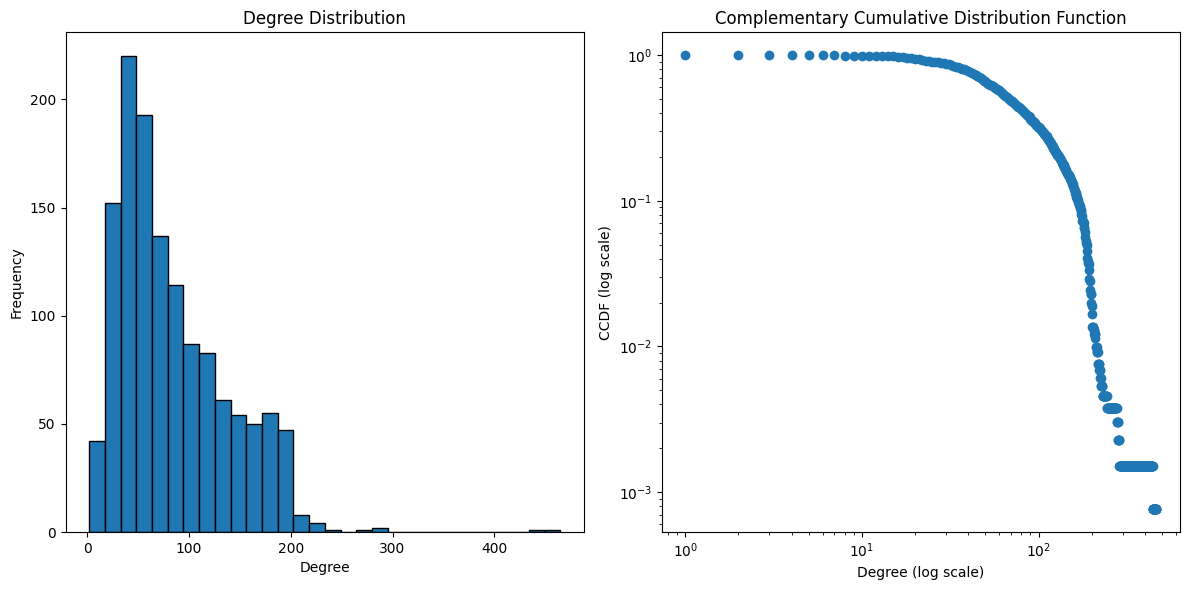

,Before Processing,After Processing
Number of nodes,4039,1313
Number of edges,88234,55113
Density,0.01082,0.063986
Is undirected graph,True,True
Is connected,True,True
Number of connected components,1,1
Size of largest connected component,4039,1313
Average cluster coefficient,0.605547,0.673917


In [9]:
def preprocessing(G):
    # Preprocessing examples
    G = nx.Graph(G)  # Convert to undirected (if necessary)
    

    # Optionally filter by degree
    degree_threshold = np.mean([d for n, d in G.degree()])
    low_degree_nodes = [n for n, d in G.degree() if d < degree_threshold]

    G.remove_nodes_from(low_degree_nodes)
    G.remove_edges_from(nx.selfloop_edges(G))  # Remove self-loops
    G.remove_nodes_from(list(nx.isolates(G)))  # Remove isolated nodes
    return G

G_new = preprocessing(G)


print("Degree Distribution before preprocessing:\n")
degree_distribution(G)
print("Degree Distribution after preprocessing:\n")
degree_distribution(G_new)
basic_graph_properties(G_new)
display(pd.DataFrame({'Before Processing': basic_graph_properties(G),
                      'After Processing': basic_graph_properties(G_new)}))


# Task 4 – Graph Properties

## Explaination

**Number of nodes:**

Number of nodes is the number of Persons in the Network

**Number of edges:**

Number of Edges are the number of cennections in a Network

**Node with highest degree:**
The Node which has the highest number of connections


**Node with highest betweenness:**
...

---


**Average degree:**
...

---

**Max degree:**
...

---

**Number of connected components:**
...

---

**Transitivity:**

The Transitivity (Global Clustering Coefficient) is defined as the ratio of the number of closed triplets (triangles) to the total number of connected triplets of nodes in the graph. In sozial Networks: How many friends share the same friends as you do.

Let $(a_{a,v})_{u,v \in V}$ be the adjacency matrix of Graph G

transitivity of G is the fraction of closed triplets (3 nodes connected by three edges) among all dyads (three nodes connected by at least two edges)

$\frac{ \sum_{u,v,w \in V} a_{u,v} a_{v,w} a_{w,u} }{ \sum_{v \in V} deg(v) \cdot (deg(v) - 1) }$


0: No clustering (no triangles in the graph).

1: Perfect clustering (every possible triplet forms a triangle, as in a complete graph)

---

**Density:**

The [density](https://en.wikipedia.org/wiki/Dense_graph) of an undirected graph measures how "completet" the graph is. Its a measure of how many edges a graph has to the maximum possible number of edges. 
Complete graphs have a density D = 1 and a graph with no edges (empty graph) is D = 0.

Density is defined as:

$D = \frac{2 \cdot |E|}{|V|(|V|-1)}$

with:
- |E|: Number of edges
- |V|: Number of Nodes

**Diameter:**

The length of the longest shortest path in a graph is called the **diameter** of the graph.

**Average shortest path length:**

How quckly can information spread through the graph

**Efficiency:**

Is the average of the inverse shortest path lengths between to pairs of nodes. It measures how "efficient" the graph is in terms of connectivity and accessibility.


Erdős–Rényi random graph model with fix number of nodes and number of edges

In [10]:
G = G_new.copy()

In [11]:
def compute_properties(G):
    properties = {
        "Number of nodes": G.number_of_nodes(),
        "Number of edges": G.number_of_edges(),
        "Node with highest degree": max(dict(G.degree()), key=lambda x: G.degree[x]),
        "Node with highest betweenness": max(nx.betweenness_centrality(G).items(), key=lambda x: x[1])[0],
        "Average degree": sum(dict(G.degree()).values()) / G.number_of_nodes(),
        "Max degree": max(dict(G.degree()).values()),
        #"Density": nx.density(G),
        "Number of connected components": nx.number_connected_components(G) if not G.is_directed() else "N/A",
        #"Diameter": nx.diameter(G) if nx.is_connected(G) else "Graph not connected",
        #"Average Shortest Path Length": nx.average_shortest_path_length(G) if nx.is_connected(G) else "Graph not connected",
        #"Efficiency": nx.global_efficiency(G),
        #"Transitivity": nx.transitivity(G),
        "Average Clustering Coefficient": nx.average_clustering(G),
        #"Assortativity": nx.degree_assortativity_coefficient(G),
    }
    return properties


start_time = time.time()
# Properties of G
properties_G = compute_properties(G)
end_time = time.time()
print(f'Time to compute properties for graph G: {end_time - start_time}')

# Erdős–Rényi Random Graphs   
random_properties_list = []

# Compute graph properties for different random Erdős–Rényi graphs with 10 different seeds
for seed in tqdm(range(10)):
    random_graph = nx.gnm_random_graph(n=G.number_of_nodes(), m=G.number_of_edges(), seed=seed)
    random_properties = compute_properties(random_graph)
    random_properties_list.append(random_properties)  

# Compute averages of random graph properties
random_properties_avg = pd.DataFrame(random_properties_list).mean().to_dict()

# Compare properties
comparison = pd.DataFrame({"G Graph": properties_G, "Erdős-Rényi Avg": random_properties_avg})
display(comparison)


Time to compute properties for graph G: 29.210763931274414


100%|██████████| 10/10 [03:55<00:00, 23.54s/it]


,G Graph,Erdős-Rényi Avg
Number of nodes,1313.000000,1313.000000
Number of edges,55113.000000,55113.000000
Node with highest degree,107.000000,722.900000
Node with highest betweenness,107.000000,886.700000
Average degree,83.949733,83.949733
Max degree,465.000000,114.900000
Number of connected components,1.000000,1.000000
Average Clustering Coefficient,0.673917,0.063945


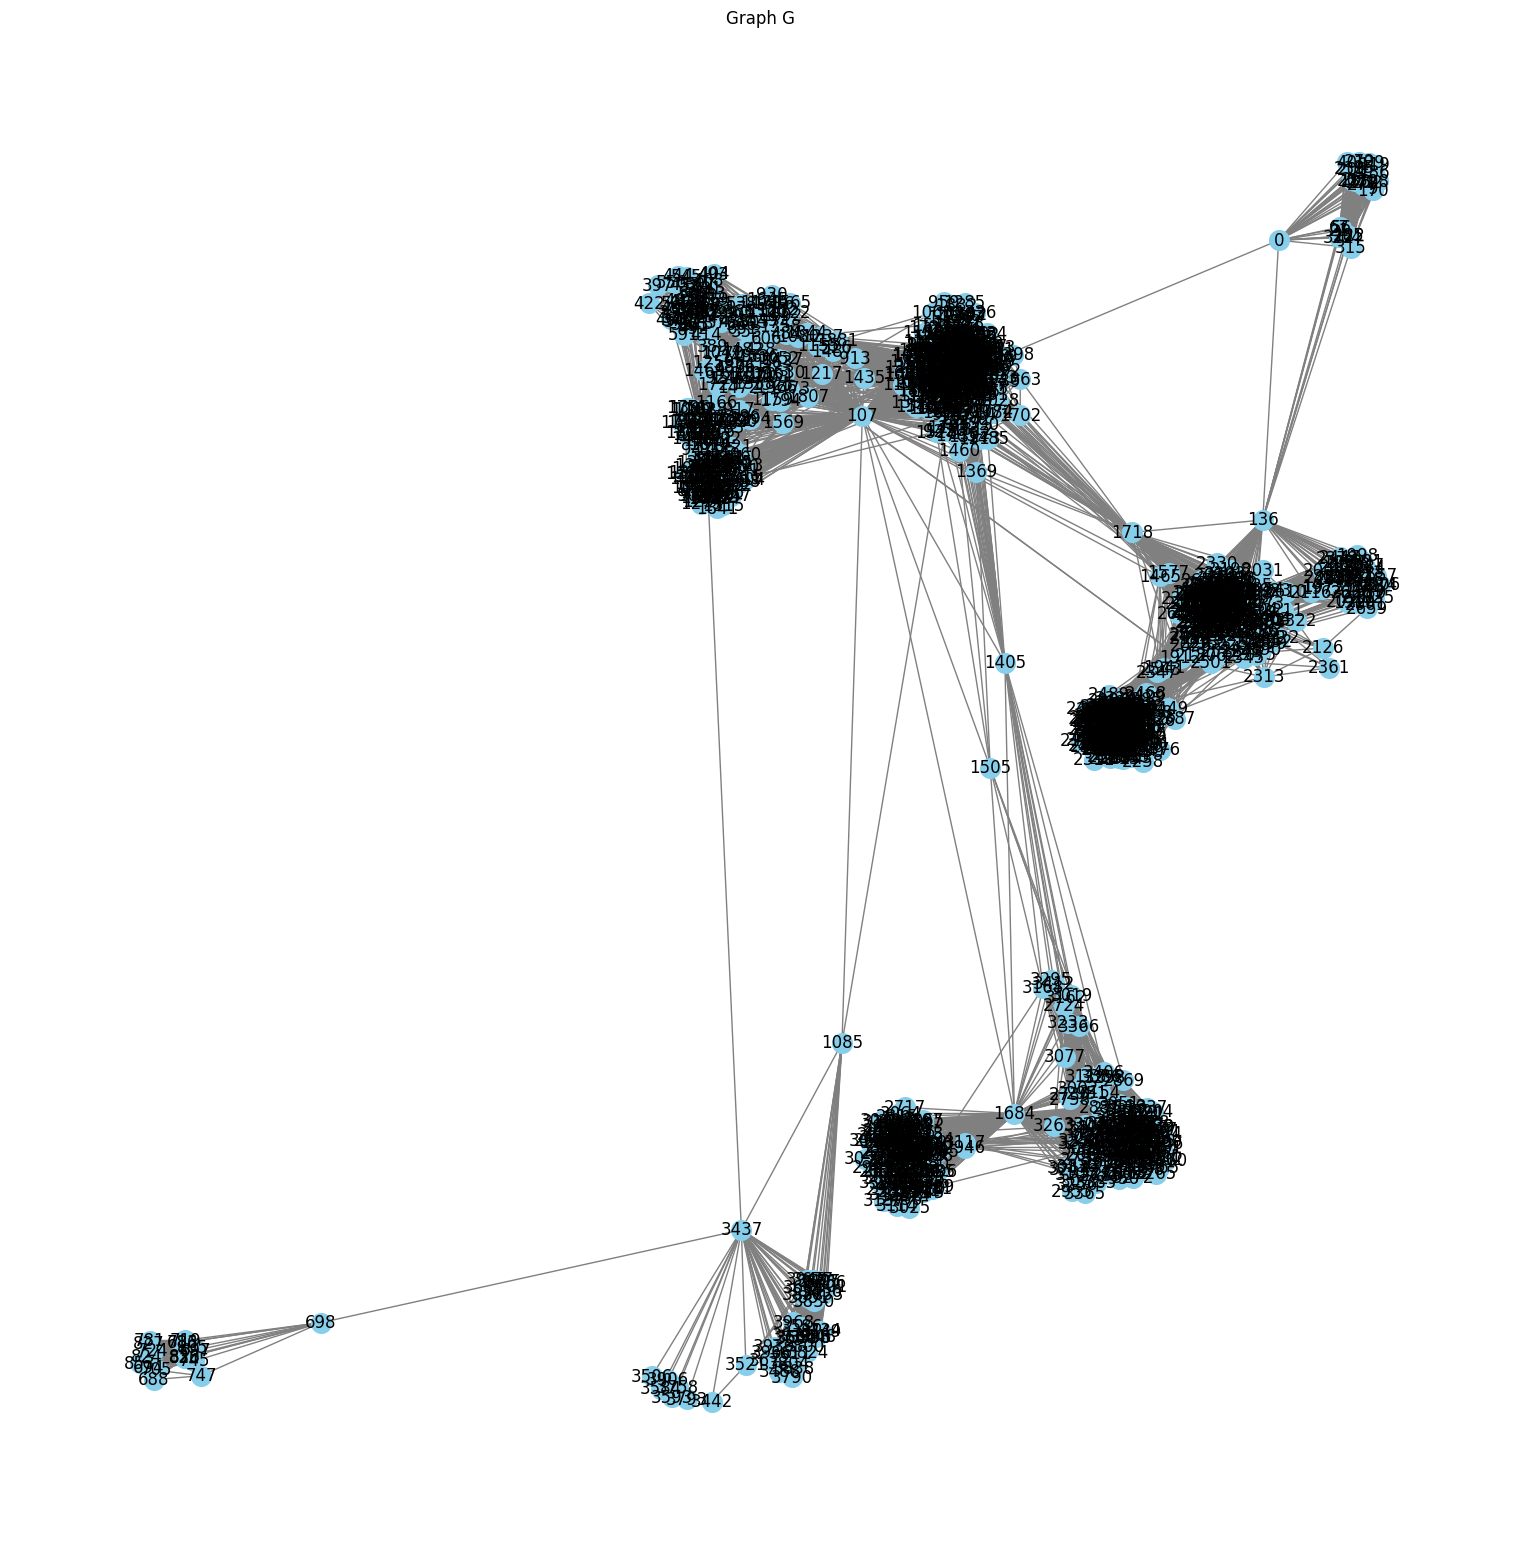

In [12]:
# draw Grpah
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=200, edge_color='gray')
plt.title("Graph G")
plt.show()

# Task 5 – Central Nodes

## Explaination of the Centralities

More information about the centrality measures can be found [here](https://www.sciencedirect.com/topics/computer-science/degree-centrality#:~:text=The%20degree%20centrality%20of%20a,high%20centrality%20by%20other%20measures.).

**Degree Centrality:** 

Measures the importance of a node in a network based on the number of direct connections (edges) it has. It reflects the local influence of a node in the graph by simply counting its neighbors. Higher degree centrality means that the node is more central.

$$
C_d(v) = \frac{deg(v)}{|V| - 1}
$$

where:
- $deg(v)$: Is the number of edges connected to the node $v$
- $|V|: Total number of nodes in the graph$

**Betweenness Centrality:**

Measures the importance of a node by quantifying how often it acts as a bridge along the shortest paths between other nodes in a graph. It identifies nodes that have significant control over the flow of information or resources in the network. High betweenness centrality means that a node is cucial in the connections between many other nodes. Nodes with a high betweenness are often called gate keepers.

$$
C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}
$$

where:
- $\sigma_{st}$: The number of shortest paths from node $s$ to node $t$
- $\sigma_{st}(v)$: The number of shortest paths from node $s$ to node $t$ that pass through node $v$




In [13]:


# Compute the centralities of nodes
centrality_df = pd.DataFrame({
    'Node': list(G.nodes),
    'Degree Centrality': nx.degree_centrality(G).values(),
    'Betweenness Centrality': nx.betweenness_centrality(G).values(),
    'Closeness Centrality': nx.closeness_centrality(G).values(),
    'Eigenvector Centrality': nx.eigenvector_centrality(G).values(),
    'PageRank': nx.pagerank(G).values()
})


# Calculate the rank of the centralities. Ascending False that the highest centralitie measure has rank 1
centrality_df['Degree Centrality Rank'] = centrality_df['Degree Centrality'].rank(ascending=False)
centrality_df['Betweenness Centrality Rank'] = centrality_df['Betweenness Centrality'].rank(ascending=False)
centrality_df['Closeness Centrality Rank'] = centrality_df['Closeness Centrality'].rank(ascending=False)
centrality_df['Eigenvector Centrality Rank'] = centrality_df['Eigenvector Centrality'].rank(ascending=False)
centrality_df['PageRank Rank'] = centrality_df['PageRank'].rank(ascending=False)


for col in ['Degree Centrality Rank', 'Betweenness Centrality Rank', 'Closeness Centrality Rank', 'Eigenvector Centrality Rank', 'PageRank Rank']:
    display(centrality_df.nsmallest(n=5, columns=[col]))



,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,PageRank,Degree Centrality Rank,Betweenness Centrality Rank,Closeness Centrality Rank,Eigenvector Centrality Rank,PageRank Rank
9,107,0.354421,0.560768,0.522085,0.000173,0.004466,1.0,1.0,1.0,445.0,1.0
32,1912,0.337652,0.191433,0.397938,0.092760,0.003051,2.0,3.0,18.0,1.0,3.0
713,2347,0.218750,0.023591,0.361731,0.080294,0.001624,3.0,15.0,82.0,38.0,8.0
579,2543,0.214939,0.039623,0.366378,0.072685,0.001647,4.0,10.0,72.5,98.0,7.0
31,1684,0.211890,0.342939,0.400978,0.000001,0.003455,5.0,2.0,15.0,971.0,2.0


,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,PageRank,Degree Centrality Rank,Betweenness Centrality Rank,Closeness Centrality Rank,Eigenvector Centrality Rank,PageRank Rank
9,107,0.354421,0.560768,0.522085,0.000173,0.004466,1.0,1.0,1.0,445.0,1.0
31,1684,0.211890,0.342939,0.400978,0.000001,0.003455,5.0,2.0,15.0,971.0,2.0
32,1912,0.337652,0.191433,0.397938,0.092760,0.003051,2.0,3.0,18.0,1.0,3.0
407,1718,0.102896,0.132134,0.442944,0.004328,0.001039,246.5,4.0,4.0,322.0,120.0
341,1577,0.117378,0.117551,0.444595,0.006830,0.001150,179.0,5.0,3.0,234.0,65.0


,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,PageRank,Degree Centrality Rank,Betweenness Centrality Rank,Closeness Centrality Rank,Eigenvector Centrality Rank,PageRank Rank
9,107,0.354421,0.560768,0.522085,0.000173,0.004466,1.0,1.0,1.0,445.0,1.0
30,428,0.049543,0.052300,0.445652,0.000580,0.001026,695.0,9.0,2.0,443.0,132.0
341,1577,0.117378,0.117551,0.444595,0.006830,0.001150,179.0,5.0,3.0,234.0,65.0
407,1718,0.102896,0.132134,0.442944,0.004328,0.001039,246.5,4.0,4.0,322.0,120.0
44,563,0.028201,0.038239,0.441454,0.000579,0.000626,1066.0,11.0,5.0,444.0,915.0


,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,PageRank,Degree Centrality Rank,Betweenness Centrality Rank,Closeness Centrality Rank,Eigenvector Centrality Rank,PageRank Rank
32,1912,0.337652,0.191433,0.397938,0.092760,0.003051,2.0,3.0,18.0,1.0,3.0
704,2266,0.168445,0.011326,0.354978,0.086607,0.001123,10.0,20.0,150.0,2.0,77.0
1122,2206,0.157774,0.000084,0.298046,0.086082,0.001028,17.0,475.0,680.0,3.0,131.0
1134,2233,0.165396,0.000840,0.298725,0.085164,0.001108,11.5,122.0,677.5,4.0,82.0
1211,2464,0.153201,0.000070,0.297641,0.084453,0.000999,24.0,540.0,685.5,5.0,166.0


,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,PageRank,Degree Centrality Rank,Betweenness Centrality Rank,Closeness Centrality Rank,Eigenvector Centrality Rank,PageRank Rank
9,107,0.354421,0.560768,0.522085,1.731933e-04,0.004466,1.0,1.0,1.0,445.0,1.0
31,1684,0.211890,0.342939,0.400978,1.209688e-06,0.003455,5.0,2.0,15.0,971.0,2.0
32,1912,0.337652,0.191433,0.397938,9.275968e-02,0.003051,2.0,3.0,18.0,1.0,3.0
39,483,0.099848,0.010293,0.395657,8.581388e-06,0.001897,263.0,21.0,23.0,762.0,4.0
639,3437,0.032774,0.053207,0.289242,6.459176e-08,0.001807,987.0,8.0,1059.0,981.0,5.0


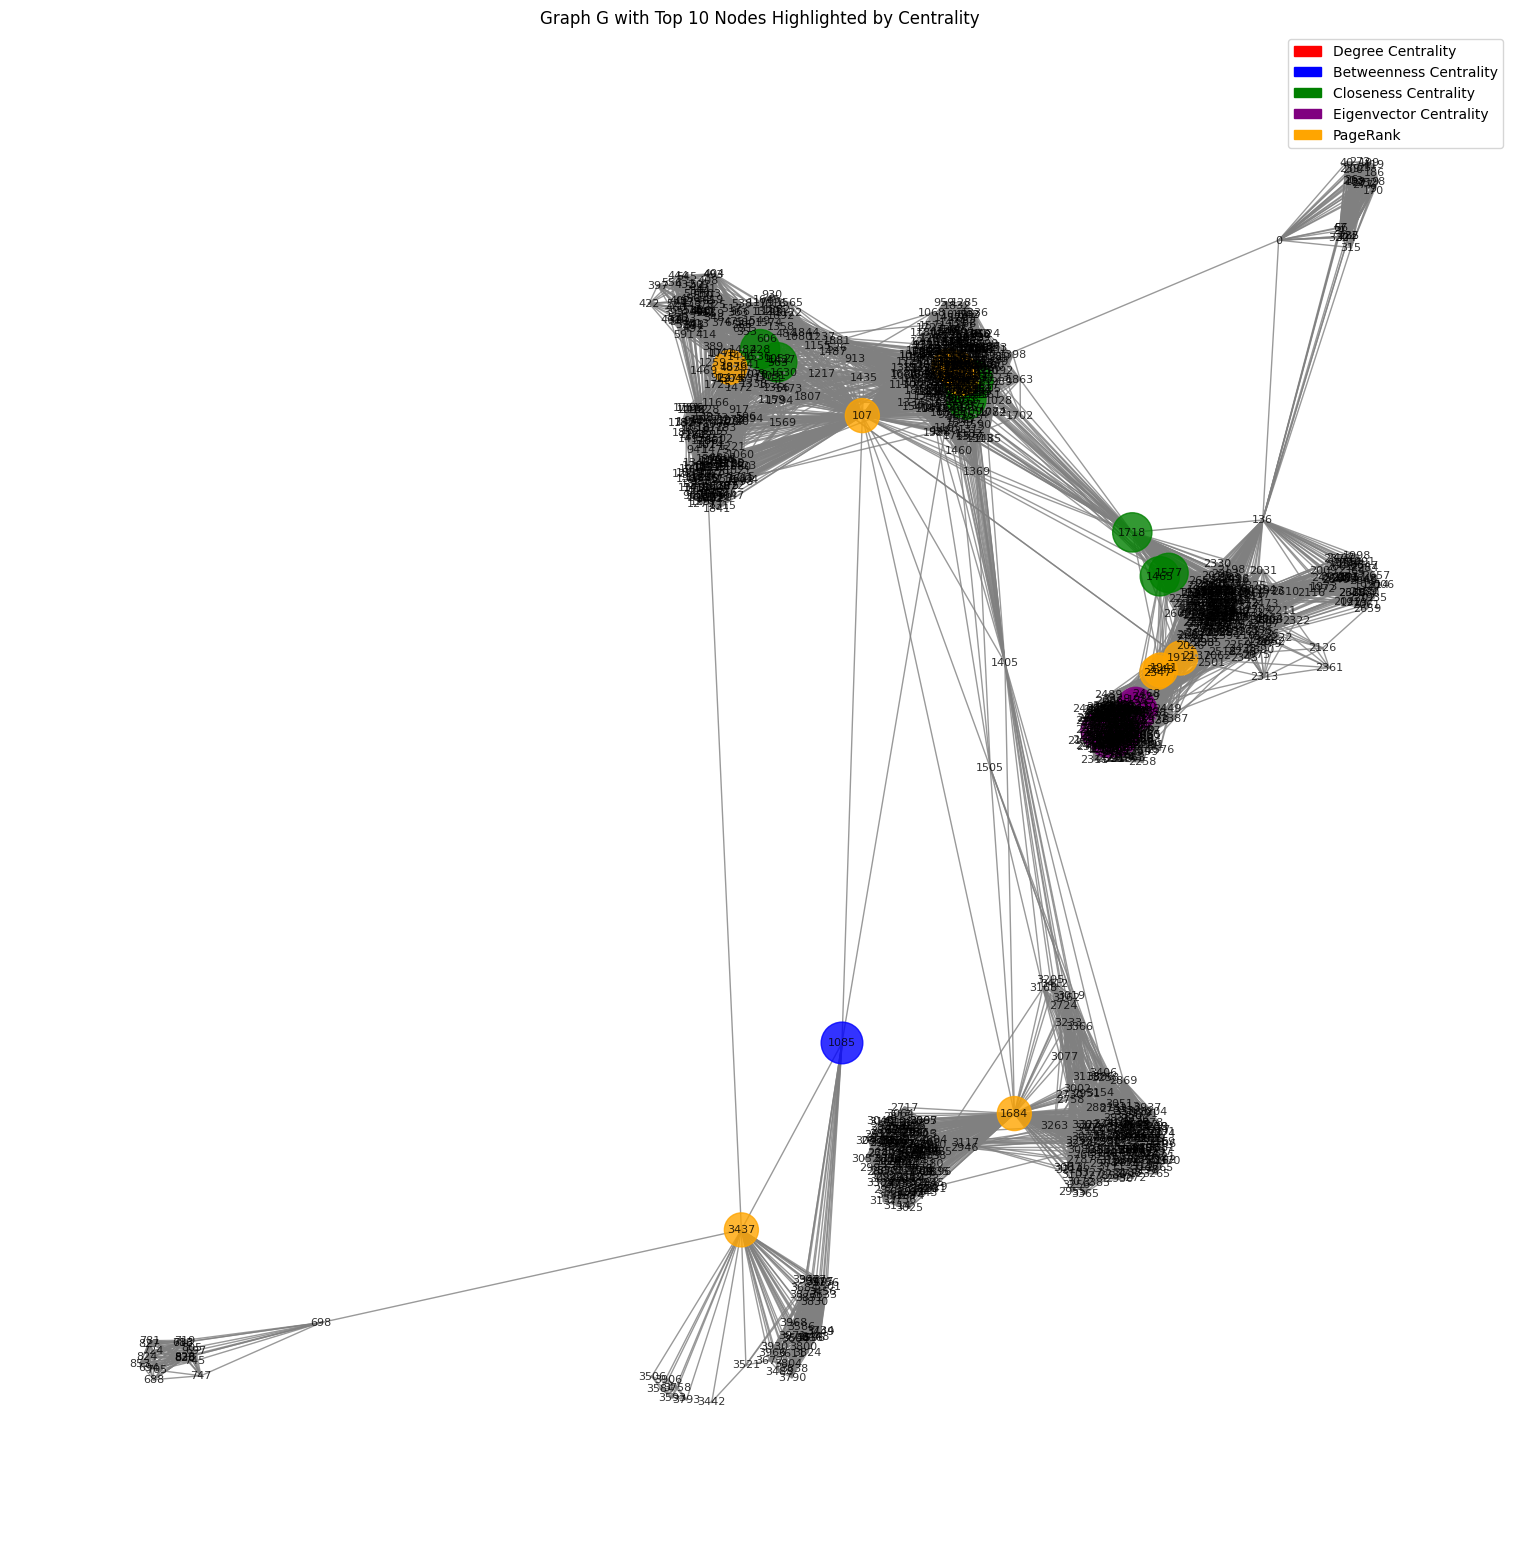

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx

# Bestimmen der Knoten mit den 10 kleinsten Rängen für jede Zentralität
top_nodes = {
    'Degree Centrality': centrality_df.nsmallest(10, 'Degree Centrality Rank')['Node'].tolist(),
    'Betweenness Centrality': centrality_df.nsmallest(10, 'Betweenness Centrality Rank')['Node'].tolist(),
    'Closeness Centrality': centrality_df.nsmallest(10, 'Closeness Centrality Rank')['Node'].tolist(),
    'Eigenvector Centrality': centrality_df.nsmallest(10, 'Eigenvector Centrality Rank')['Node'].tolist(),
    'PageRank': centrality_df.nsmallest(10, 'PageRank Rank')['Node'].tolist(),
}

# Farben und Größen für jede Zentralität
colors = {
    'Degree Centrality': 'red',
    'Betweenness Centrality': 'blue',
    'Closeness Centrality': 'green',
    'Eigenvector Centrality': 'purple',
    'PageRank': 'orange',
}

sizes = {
    'Degree Centrality': 10,
    'Betweenness Centrality': 9,
    'Closeness Centrality': 8,
    'Eigenvector Centrality': 7,
    'PageRank': 6,
}

# Initialisieren der Knotenfarben und -größen
node_colors = ['grey'] * G.number_of_nodes()
node_sizes = [1] * G.number_of_nodes()

# Knoten einfärben und Größen zuweisen
for centrality, nodes in top_nodes.items():
    for node in nodes:
        idx = list(G.nodes).index(node)
        node_colors[idx] = colors[centrality]
        node_sizes[idx] = sizes[centrality] * 100  # Multiplikator für bessere Sichtbarkeit

# Graph zeichnen
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color='grey', font_size=8, alpha=0.8)
plt.title("Graph G with Top 10 Nodes Highlighted by Centrality")

# Legende erstellen
legend_handles = [mpatches.Patch(color=color, label=centrality) for centrality, color in colors.items()]
plt.legend(handles=legend_handles, loc='best')
plt.show()

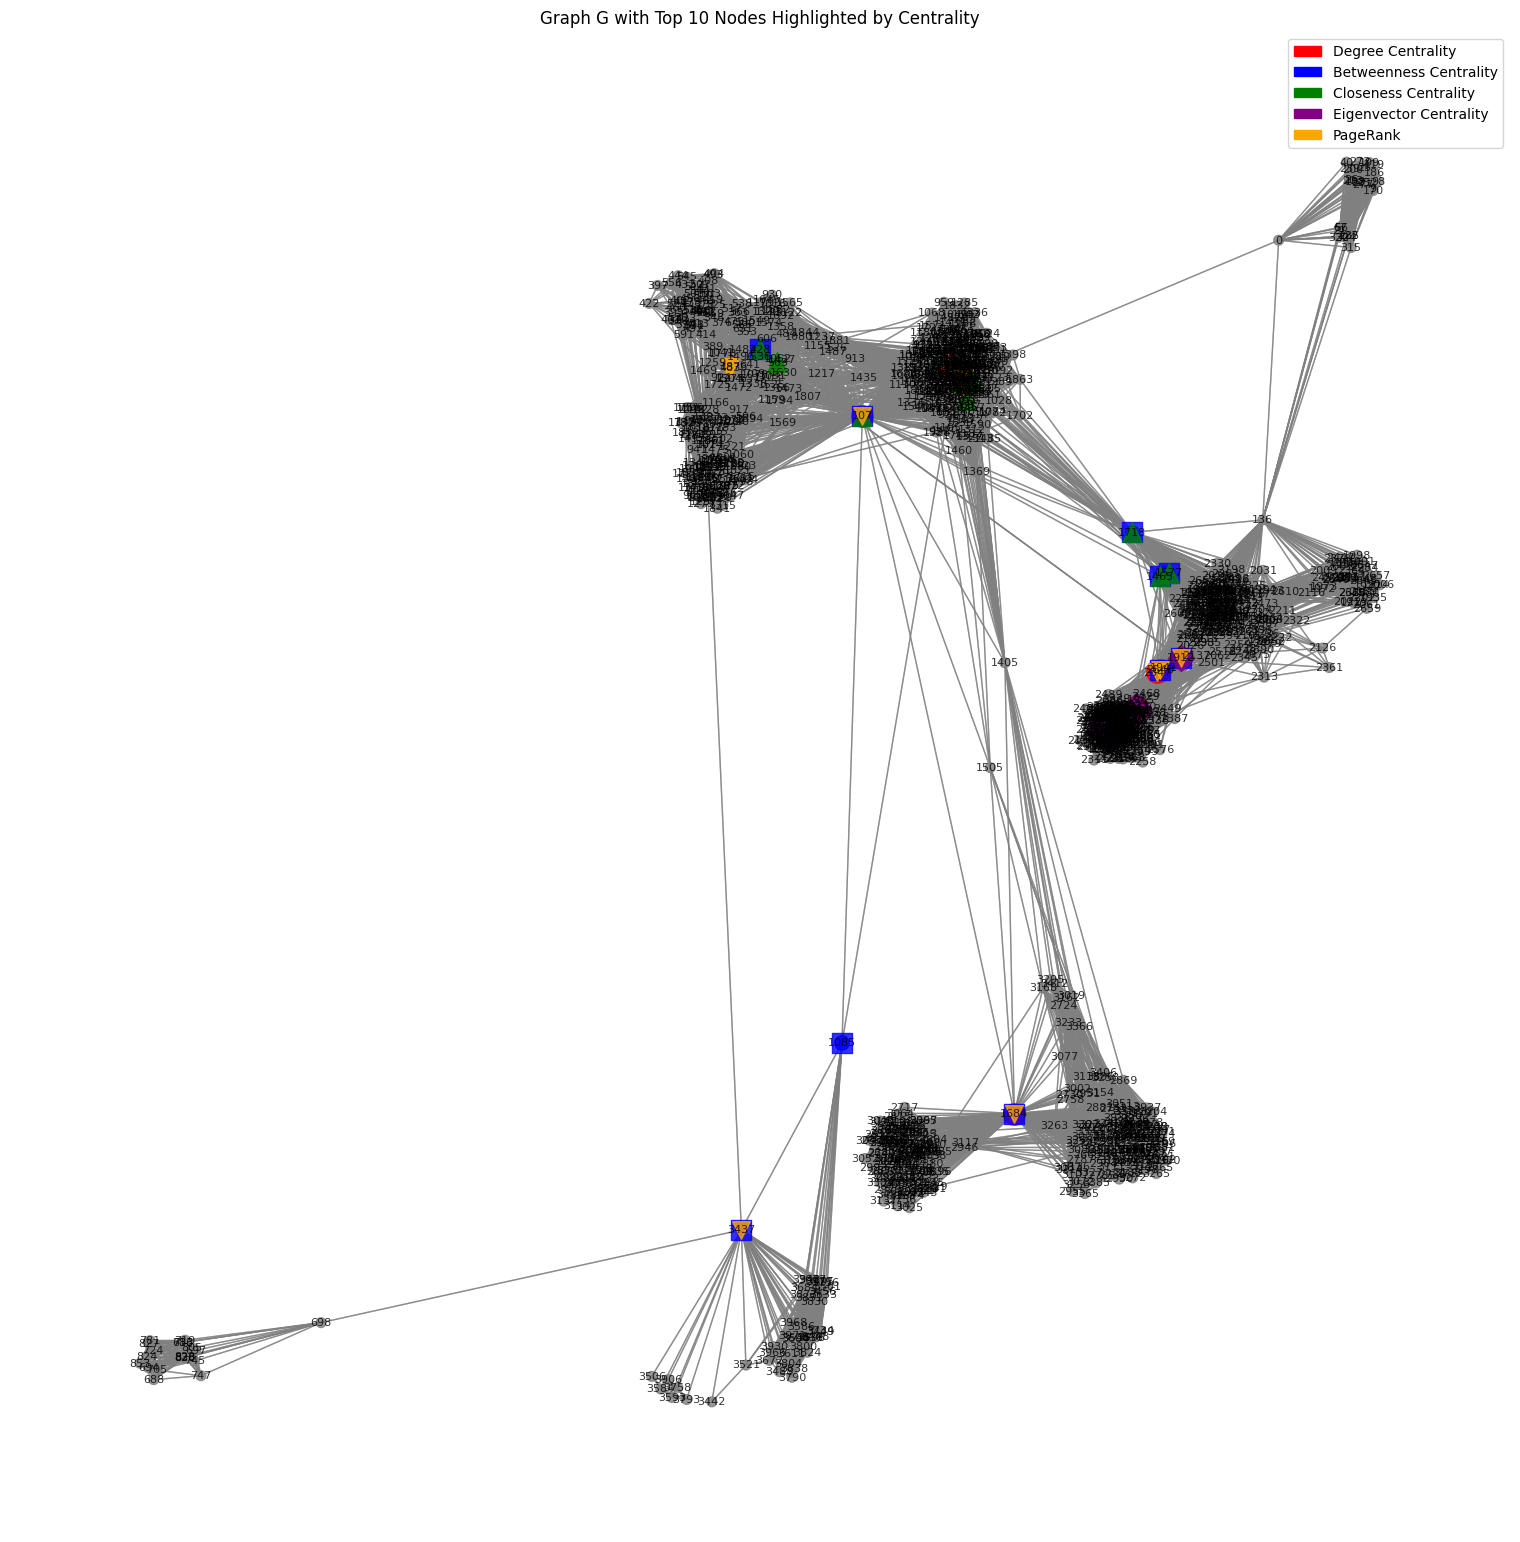

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx

# Bestimmen der Knoten mit den 10 kleinsten Rängen für jede Zentralität
top_nodes = {
    'Degree Centrality': centrality_df.nsmallest(10, 'Degree Centrality Rank')['Node'].tolist(),
    'Betweenness Centrality': centrality_df.nsmallest(10, 'Betweenness Centrality Rank')['Node'].tolist(),
    'Closeness Centrality': centrality_df.nsmallest(10, 'Closeness Centrality Rank')['Node'].tolist(),
    'Eigenvector Centrality': centrality_df.nsmallest(10, 'Eigenvector Centrality Rank')['Node'].tolist(),
    'PageRank': centrality_df.nsmallest(10, 'PageRank Rank')['Node'].tolist(),
}

# Farben für jede Zentralität
colors = {
    'Degree Centrality': 'red',
    'Betweenness Centrality': 'blue',
    'Closeness Centrality': 'green',
    'Eigenvector Centrality': 'purple',
    'PageRank': 'orange',
}

# Symbole für jede Zentralität
markers = {
    'Degree Centrality': 'o',  # Kreis
    'Betweenness Centrality': 's',  # Quadrat
    'Closeness Centrality': '^',  # Dreieck
    'Eigenvector Centrality': 'D',  # Diamant
    'PageRank': 'v',  # Umgekehrtes Dreieck
}

sizes = {
    'Degree Centrality': 12,
    'Betweenness Centrality': 11,
    'Closeness Centrality': 10,
    'Eigenvector Centrality': 9,
    'PageRank': 8,
}

# Scaler for better visability
scaler = 10

# Initialisieren der Knotenfarben und -formen
node_colors = ['grey'] * G.number_of_nodes()
node_shapes = ['o'] * G.number_of_nodes()
node_sizes = [5 * scaler] * G.number_of_nodes()

# Knoten einfärben und Formen zuweisen
for centrality, nodes in top_nodes.items():
    for node in nodes:
        idx = list(G.nodes).index(node)
        node_colors[idx] = colors[centrality]
        node_shapes[idx] = markers[centrality]
        node_sizes[idx] = sizes[centrality] * scaler  

# Graph zeichnen
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color='grey', font_size=8, alpha=0.8)

nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='grey')

# Knoten manuell zeichnen
for centrality, nodes in top_nodes.items():
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors[centrality], node_shape=markers[centrality], node_size=sizes[centrality]*2*scaler, label=centrality, alpha=0.8)

#nx.draw_networkx_labels(G, pos, font_size=4)

plt.title("Graph G with Top 10 Nodes Highlighted by Centrality")

# Legende erstellen
legend_handles = [mpatches.Patch(color=color, label=centrality) for centrality, color in colors.items()]
plt.legend(handles=legend_handles, loc='best')
plt.show()

# Task 6 – Node Roles



In [23]:
quantiles = centrality_df['Degree Centrality'].quantile([0.75]).values[0]

print(quantiles)

0.08917682926829269


In [17]:
dd

NameError: name 'dd' is not defined

Role
Regular       362
Big Fish      325
Loner         250
Bridge        196
Ambassador    110
Influencer     70
Name: count, dtype: int64


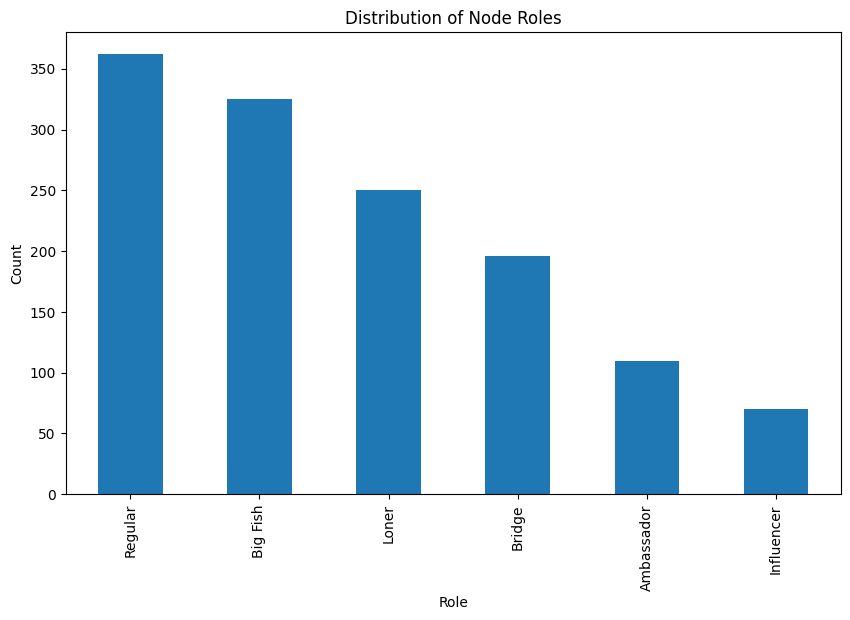

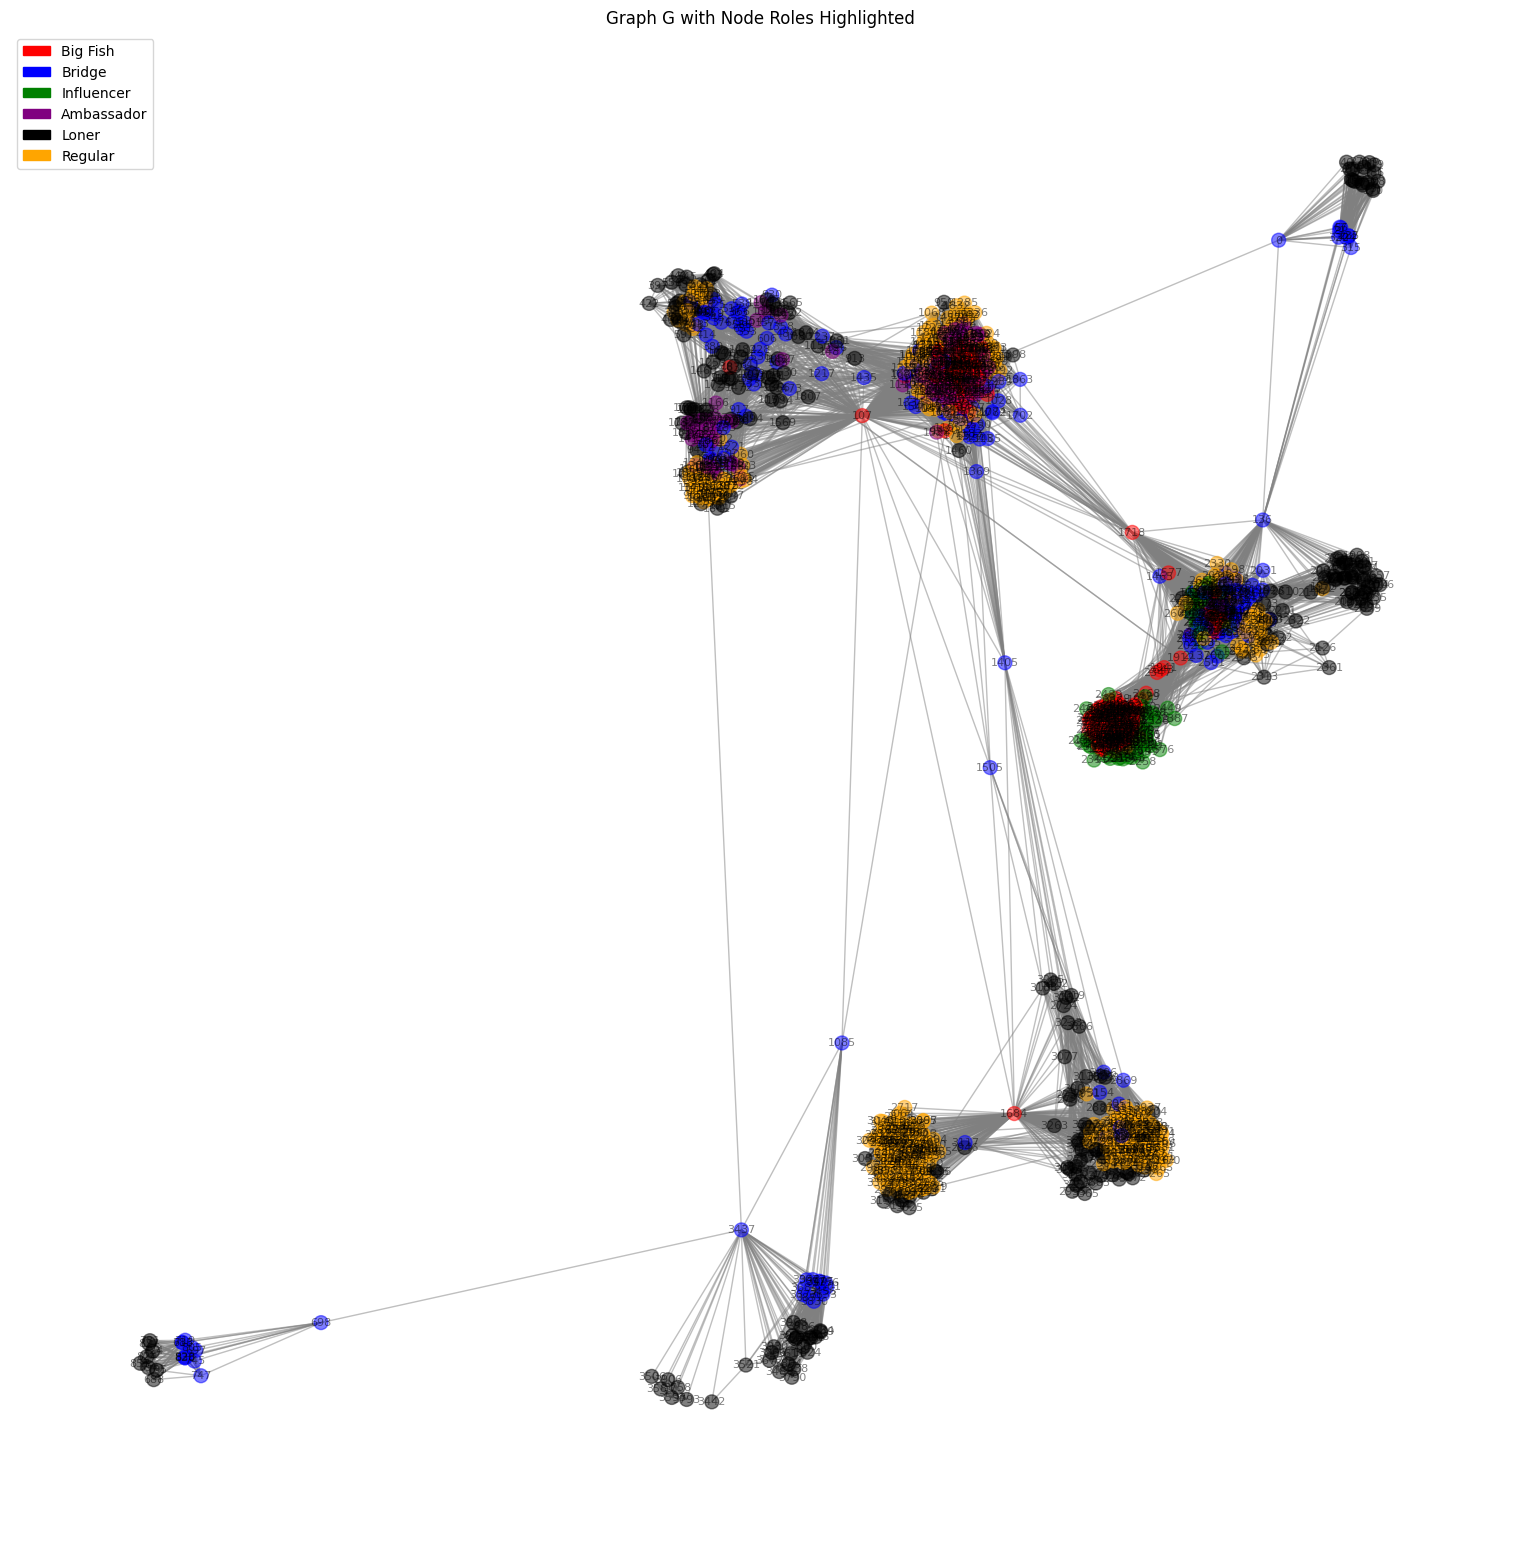

In [27]:
import pandas as pd
import networkx as nx



# Rollen zuweisen basierend auf den Zentralitäten
def assign_role(row):


    if row['Degree Centrality'] > centrality_df['Degree Centrality'].quantile([0.75]).values[0]:
        return 'Big Fish'
    elif row['Betweenness Centrality'] > centrality_df['Betweenness Centrality'].quantile([0.75]).values[0]:
        return 'Bridge'
    elif row['Eigenvector Centrality'] > centrality_df['Eigenvector Centrality'].quantile([0.75]).values[0]:
        return 'Influencer'
    elif row['Closeness Centrality'] > centrality_df['Closeness Centrality'].quantile([0.75]).values[0]:
        return 'Ambassador'
    elif row['Degree Centrality'] < centrality_df['Degree Centrality'].quantile([0.25]).values[0]:
        return 'Loner'
    else:
        return 'Regular'

centrality_df['Role'] = centrality_df.apply(assign_role, axis=1)

# Rollen analysieren
role_counts = centrality_df['Role'].value_counts()
print(role_counts)

# Rollen visualisieren
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
role_counts.plot(kind='bar')
plt.title('Distribution of Node Roles')
plt.xlabel('Role')
plt.ylabel('Count')
plt.show()

# Rollen im Graphen visualisieren
role_colors = {
    'Big Fish': 'red',
    'Bridge': 'blue',
    'Influencer': 'green',
    'Ambassador': 'purple',
    'Loner': 'black',
    'Regular': 'orange'
}

node_colors = [role_colors[role] for role in centrality_df['Role']]

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=100, edge_color='grey', font_size=8, alpha=0.5)
plt.title("Graph G with Node Roles Highlighted")

# Legende erstellen
legend_handles = [mpatches.Patch(color=color, label=role) for role, color in role_colors.items()]
plt.legend(handles=legend_handles, loc='best')

plt.show()

# Task 7 – Community Discovery

Explaination:

**Girvan Newman Algorithm**


**Louvain Algorithm:**



In [ ]:
def plot_cluster(G, clusters):


    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    # Knotenfarben basierend auf den Clustern zuweisen
    node_colors = []
    for node in G.nodes():
        for i, cluster in enumerate(clusters):
            if node in cluster:
                node_colors.append(colors[i % len(colors)])

    # Netzwerk zeichnen
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G, seed=seed)
    fig = nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=100, font_size=8)
    plt.show()
    return None

In [ ]:
girvan_newman = nx.algorithms.community.centrality.girvan_newman(G)
j = 2
for i, communities in enumerate(girvan_newman):
    if i == j:
        print('Communities:', len(communities))
        print(tuple(sorted(c) for c in communities))
        gn_clusters = tuple(set(sorted(c)) for c in communities)


print(gn_clusters)
plot_cluster(G, gn_clusters)

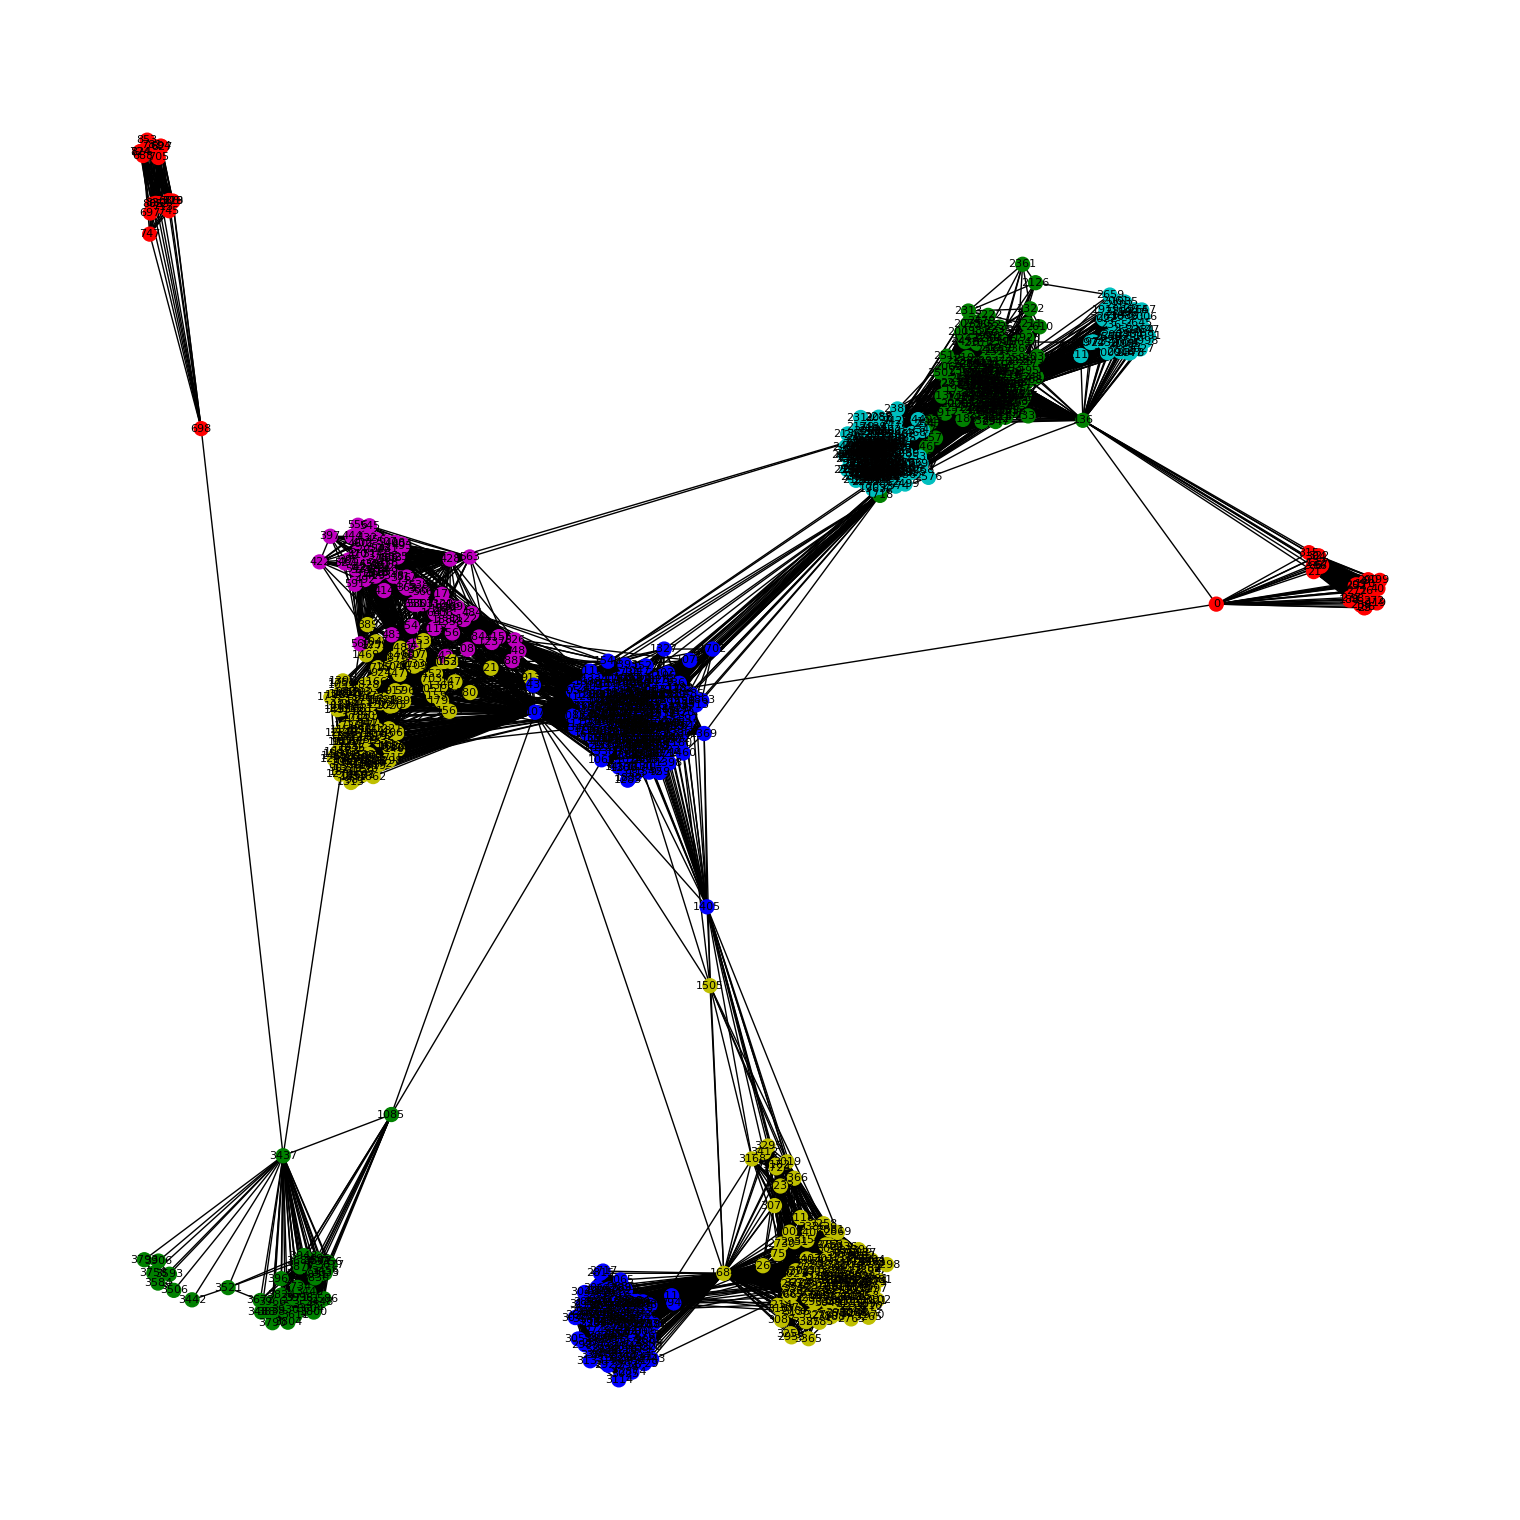

In [ ]:
louvain_cluster = nx.algorithms.community.louvain_communities(G, seed=42)
plot_cluster(G, louvain_cluster)

# Task 8 – Conclusions and Future Work